# 1.Exploratory Data Analysis


## Improving marketing strategies and customer satisfaction.


### Metric for success 

The company needs to identify distinct customer segments to tailor marketing efforts more effectively and enhance    customer experience.




## The Dataset

The Mall Customers dataset contains information about customers, including:

CustomerID:             Unique identifier for each customer.
Genre:                  Gender of the customer.
Age:                    Age of the customer.
Annual Income (k$):     Annual income of the customer in thousands of dollars.
Spending Score (1-100): Score assigned by the mall based on customer behavior and spending.

###  Recording the Experimental Design
#### Objectives
      1.Primary Objective: Identify distinct customer segments based on demographic information, annual income, and spending             scores to improve targeted marketing strategies.
      
      2.Secondary Objectives: 
           -Understand the spending behavior of different customer segments.
           -Analyze the impact of demographic factors (age and gender) on spending scores.
           -Predict customer spending scores using demographic and income data.

### Data Relevance
The data helps us perform descriptive statistics and visualizations to understand data distributions and relationships.

Segmentation and Clustering:
     - Apply clustering algorithms to segment customers.
     - Validate and interpret the characteristics of each segment.

Spending Behavior Analysis:
       - Conduct correlation analysis to identify relationships between variables.
       - Use regression models to predict spending scores.

Demographic Analysis:
       - Use statistical tests to compare spending scores across different demographic groups.
       - Visualize differences using appropriate charts.


## 2. Reading the Data

In [4]:

import pandas as pd

# Load the dataset from the URL
url = 'http://bit.ly/MallCustomersDataset'
Mall_customers = pd.read_csv(url)






## 3. Checking the Data

In [6]:
# Determining the no. of records in our dataset
#
num_records = Mall_customers.shape[0]
print(f"The number of records in the dataset is: {num_records}")

The number of records in the dataset is: 200


In [7]:
# Previewing the top of our dataset
#
Mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Previewing the bottom of our dataset
#
Mall_customers.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
# Checking whether each column has an appropriate datatype
#
print("\nChecking if each column has an appropriate datatype:")
expected_dtypes = {
    'CustomerID': 'int64',
    'Genre': 'object',
    'Age': 'int64',
    'Annual Income (k$)': 'int64',
    'Spending Score (1-100)': 'int64'
}

for column, expected_dtype in expected_dtypes.items():
    actual_dtype = Mall_customers[column].dtype
    if actual_dtype == expected_dtype:
        print(f"Column '{column}' has the correct datatype: {actual_dtype}")
    else:
        print(f"Column '{column}' has an incorrect datatype: {actual_dtype}. Expected: {expected_dtype}")


Checking if each column has an appropriate datatype:
Column 'CustomerID' has the correct datatype: int64
Column 'Genre' has the correct datatype: object
Column 'Age' has the correct datatype: int64
Column 'Annual Income (k$)' has the correct datatype: int64
Column 'Spending Score (1-100)' has the correct datatype: int64


 ## 4. External Data Source Validation

### External data source validation is crucial to ensure the integrity, accuracy, and reliability of the data being used in analysis. 

### Key steps for validating an external data source:

Here are the key steps for validating an external data source:

Source Credibility: 
      - Verify the credibility and reliability of the data source.

Data Consistency:
      - Check for consistency and completeness in the data.

Data Accuracy: 
      - Compare the data with known benchmarks or other reliable sources.

Data Timeliness:
      - Ensure the data is up-to-date and relevant for the analysis.

Data Documentation:
      - Review any accompanying documentation or metadata for the data.

## 5. Tidying the Dataset


In [14]:
# Checking for Outliers
## Identifying outliers using the IQR method
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Q1 for {column}: {Q1}, Q3 for {column}: {Q3}, IQR: {IQR}")
    print(f"Lower bound for {column}: {lower_bound}, Upper bound for {column}: {upper_bound}")
    return outliers


## Checking for outliers in numerical columns
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for column in numerical_columns:
    outliers = detect_outliers(Mall_customers, column)
    print(f"\nOutliers in '{column}':")
    print(outliers)
    
#Visualizing with box plots
plt.figure(figsize=(18, 5))
for i, column in enumerate(numerical_columns): 
        plt.subplot(1, 3, i+1)
        sns.boxplot(x=Mall_customers[column]) 
        plt.title(f'Box Plot of {column}')
            
plt.tight_layout()
plt.show() 



    









ImportError: cannot import name 'int' from 'numpy' (C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\numpy\__init__.py)

In [11]:
# Checking for Anomalies
print("\nChecking for missing data in each column:")
missing_data = Mall_customers.isnull().sum()
print(missing_data)




Checking for missing data in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
# Identifying the Missing Data

## Visualizing missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(Mall_customers.isnull(), cbar=False, cmap='viridis')
plt.title('heatmap of Missing Data')
plt.show()


NameError: name 'plt' is not defined

In [13]:
# Dealing with the Missing Data
# Very that missing data is handled
Mall_customers['Age'].fillna(Mall_customers['Age'].mean(), inplace=True)
Mall_customers['Annual Income (k$)'].fillna(Mall_customers['Annual Income (k$)'].mean(), inplace=True)
Mall_customers['Spending Score (1-100)'].fillna(Mall_customers['Spending Score (1-100)'].mean(), inplace=True)
Mall_customers['Genre'].fillna(Mall_customers['Genre'].mode()[0], inplace=True)
print("\nChecking for missing data after handling:")
missing_data_after = Mall_customers.isnull().sum()
print(missing_data_after)


Checking for missing data after handling:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [133]:
## More data cleaning procedures
# Removing duplicate records
Mall_customers.drop_duplicates(inplace=True)
print("\nDataset shape after removing duplicates:", Mall_customers.shape)

# Handling outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    Mall_customers = remove_outliers(Mall_customers, column)

print("\nDataset shape after removing outliers:", Mall_customers.shape)

# Ensuring correct data types
Mall_customers['CustomerID'] = Mall_customers['CustomerID'].astype(int)
Mall_customers['Age'] = Mall_customers['Age'].astype(int)
Mall_customers['Annual Income (k$)'] = Mall_customers['Annual Income (k$)'].astype(int)
Mall_customers['Spending Score (1-100)'] = Mall_customers['Spending Score (1-100)'].astype(int)

# Encoding categorical variables
Mall_customers['Genre'] = Mall_customers['Genre'].map({'Male': 0, 'Female': 1})

# Renaming columns for better readability
Mall_customers.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

# Summary statistics after cleaning
print("\nSummary statistics for numerical columns after cleaning:")
print(Mall_customers.describe())




Dataset shape after removing duplicates: (200, 6)

Dataset shape after removing outliers: (198, 6)

Summary statistics for numerical columns after cleaning:
       CustomerID      Gender         Age  Annual_Income  Spending_Score  \
count  198.000000  198.000000  198.000000     198.000000      198.000000   
mean    99.500000    0.565657   38.929293      59.787879       50.196970   
std     57.301832    0.496927   14.016852      25.237259       25.746846   
min      1.000000    0.000000   18.000000      15.000000        1.000000   
25%     50.250000    0.000000   28.250000      40.500000       35.000000   
50%     99.500000    1.000000   36.000000      61.000000       50.000000   
75%    148.750000    1.000000   49.000000      77.750000       72.750000   
max    198.000000    1.000000   70.000000     126.000000       99.000000   

       Income_Bin  
count  198.000000  
mean     1.333333  
std      1.007585  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000

## 6. Exploratory Analysis


Summary statistics for numerical columns:
       CustomerID      Gender         Age  Annual_Income  Spending_Score  \
count  198.000000  198.000000  198.000000     198.000000      198.000000   
mean    99.500000    0.565657   38.929293      59.787879       50.196970   
std     57.301832    0.496927   14.016852      25.237259       25.746846   
min      1.000000    0.000000   18.000000      15.000000        1.000000   
25%     50.250000    0.000000   28.250000      40.500000       35.000000   
50%     99.500000    1.000000   36.000000      61.000000       50.000000   
75%    148.750000    1.000000   49.000000      77.750000       72.750000   
max    198.000000    1.000000   70.000000     126.000000       99.000000   

       Income_Bin  
count  198.000000  
mean     1.333333  
std      1.007585  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  

Correlation matrix:
                CustomerID    Gender       Age  Annual_Income  Spending

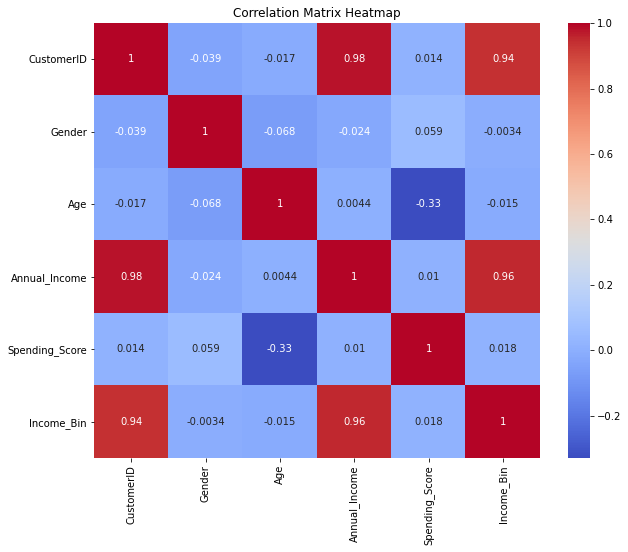

KeyError: 'Annual Income (k$)'

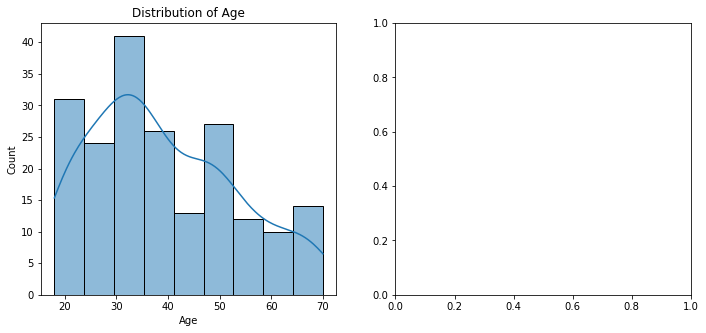

In [134]:
# Ploting the bivariate summaries and recording our observations
# Summary statistics
print("\nSummary statistics for numerical columns:")
print(Mall_customers.describe())

# Correlation analysis
print("\nCorrelation matrix:")
correlation_matrix = Mall_customers.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Distribution plots for numerical columns
plt.figure(figsize=(18, 5))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(Mall_customers[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns by Genre
plt.figure(figsize=(18, 5))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Genre', y=column, data=Mall_customers)
    plt.title(f'Box Plot of {column} by Genre')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships
sns.pairplot(Mall_customers, hue='Genre')



In [ ]:
## Data Reduction
# Dimensionality Reduction using PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'http://bit.ly/MallCustomersDataset'
Mall_customers = pd.read_csv(url)

# Selecting numerical features for PCA
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = Mall_customers[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenating with the original Genre column
final_df = pd.concat([pca_df, Mall_customers[['Genre']]], axis=1)

print(final_df.head())

# Visualizing the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Genre', data=final_df)
plt.title('PCA of Mall Customers')
plt.show()









## 7. Implementing the Solution

In [135]:
## Implementing the Solution
# Feature Selection using Recursive Feature Elimination 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
url = 'http://bit.ly/MallCustomersDataset'
Mall_customers = pd.read_csv(url)

# Preparing data for RFE
X = Mall_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = Mall_customers['Genre'].apply(lambda x: 1 if x == 'Male' else 0)

# Using Logistic Regression as the model
model = LogisticRegression()

# Applying RFE
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

selected_features = X.columns[fit.support_]
print("Selected features: ", selected_features)

## Sampling
# Load the dataset
url = 'http://bit.ly/MallCustomersDataset'
Mall_customers = pd.read_csv(url)

# Sampling 50% of the data
sampled_df = Mall_customers.sample(frac=0.5, random_state=1)

print("Original dataset shape:", Mall_customers.shape)
print("Sampled dataset shape:", sampled_df.shape)

## Aggregation
# Suppose we had a 'Date' column and we want to aggregate the data by month 
# Adding a Date column for demonstration
Mall_customers['Date'] = pd.date_range(start='2020-01-01', periods=len(Mall_customers), freq='D')

# Aggregating data by month 
Mall_customers['Month'] = Mall_customers['Date'].dt.to_period('M')
monthly_data = Mall_customers.groupby('Month').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

print(monthly_data.head())

## Discretization
# Discretizing the 'Annual Income (k$)' column into bins
Mall_customers['Income_Bin'] = pd.cut(Mall_customers['Annual Income (k$)'], bins=5, labels=False)

print(Mall_customers[['Annual Income (k$)', 'Income_Bin']].head())


Num Features: 2
Selected Features: [ True  True False]
Feature Ranking: [1 1 2]
Selected features:  Index(['Age', 'Annual Income (k$)'], dtype='object')
Original dataset shape: (200, 5)
Sampled dataset shape: (100, 5)
     Month        Age  Annual Income (k$)  Spending Score (1-100)
0  2020-01  35.354839           21.741935               48.903226
1  2020-02  39.206897           39.034483               50.448276
2  2020-03  46.387097           51.903226               51.677419
3  2020-04  40.366667           62.666667               48.333333
4  2020-05  35.612903           73.451613               52.129032
   Annual Income (k$)  Income_Bin
0                  15           0
1                  15           0
2                  16           0
3                  16           0
4                  17           0


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.







Dataset loaded successfully:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

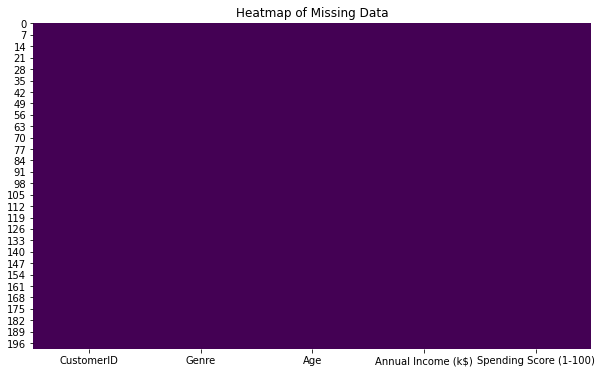


Checking for missing data after handling:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary statistics for numerical columns:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


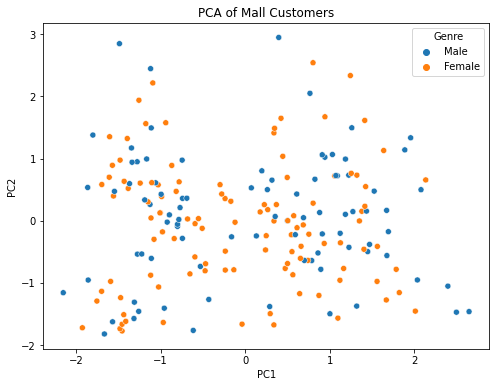


Selected features using RFE:  Index(['Age', 'Annual Income (k$)'], dtype='object')

Original dataset shape: (200, 5)
Sampled dataset shape: (100, 5)

Discretization of 'Annual Income (k$)':
   Annual Income (k$)  Income_Bin
0                  15           0
1                  15           0
2                  16           0
3                  16           0
4                  17           0


In [136]:
## Reviewing the Solution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
url = 'http://bit.ly/MallCustomersDataset'
Mall_customers = pd.read_csv(url)

# Verify the dataset is loaded correctly
print("\nDataset loaded successfully:")
print(Mall_customers.head())

print("\nDataset information:")
print(Mall_customers.info())

# Check for missing data if any
print("\nChecking for missing data in each column:")
missing_data = Mall_customers.isnull().sum()
print(missing_data)

# Visualize missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(Mall_customers.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Handling missing data if any
Mall_customers['Age'].fillna(Mall_customers['Age'].mean(), inplace=True)
Mall_customers['Annual Income (k$)'].fillna(Mall_customers['Annual Income (k$)'].mean(), inplace=True)
Mall_customers['Spending Score (1-100)'].fillna(Mall_customers['Spending Score (1-100)'].mean(), inplace=True)
Mall_customers['Genre'].fillna(Mall_customers['Genre'].mode()[0], inplace=True)

# Verify that missing data is handled
print("\nChecking for missing data after handling:")
missing_data_after = Mall_customers.isnull().sum()
print(missing_data_after)

# Summary statistics
print("\nSummary statistics for numerical columns:")
print(Mall_customers.describe())

# Dimensionality Reduction using PCA
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = Mall_customers[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenating with the original Genre column
final_df = pd.concat([pca_df, Mall_customers[['Genre']]], axis=1)

# Visualizing the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Genre', data=final_df)
plt.title('PCA of Mall Customers')
plt.show()

# Feature Selection using Recursive Feature Elimination (RFE)
X = Mall_customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = Mall_customers['Genre'].apply(lambda x: 1 if x == 'Male' else 0)

# Using Logistic Regression as the model
model = LogisticRegression()

# Applying RFE
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("\nSelected features using RFE: ", selected_features)

# Sampling
sampled_df = Mall_customers.sample(frac=0.5, random_state=1)

print("\nOriginal dataset shape:", Mall_customers.shape)
print("Sampled dataset shape:", sampled_df.shape)

# Discretization
Mall_customers['Income_Bin'] = pd.cut(Mall_customers['Annual Income (k$)'], bins=5, labels=False)

print("\nDiscretization of 'Annual Income (k$)':")
print(Mall_customers[['Annual Income (k$)', 'Income_Bin']].head())


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?